출처 : Tensorflow 튜토리얼

In [1]:
import tensorflow as tf

import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)

2.8.0


# 패션 MNIST 데이터셋 임포트하기

In [2]:
fashion_mnist = tf.keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

4431872/4422102 [==============================] - 0s 0us/step


In [3]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

# 데이터 탐색

In [4]:
train_images.shape

(60000, 28, 28)

In [5]:
len(train_labels)

60000

In [6]:
train_labels

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [7]:
test_images.shape

(10000, 28, 28)

In [8]:
len(test_labels)

10000

# 데이터 전처리

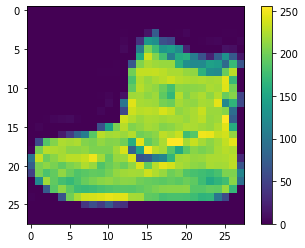

In [9]:
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
#plt.grid(False)
plt.show()

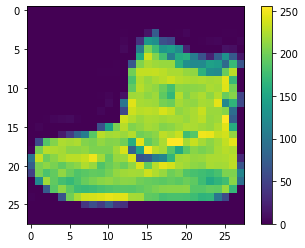

In [10]:
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

In [11]:
train_images = train_images / 255.0
test_images = test_images / 255.0

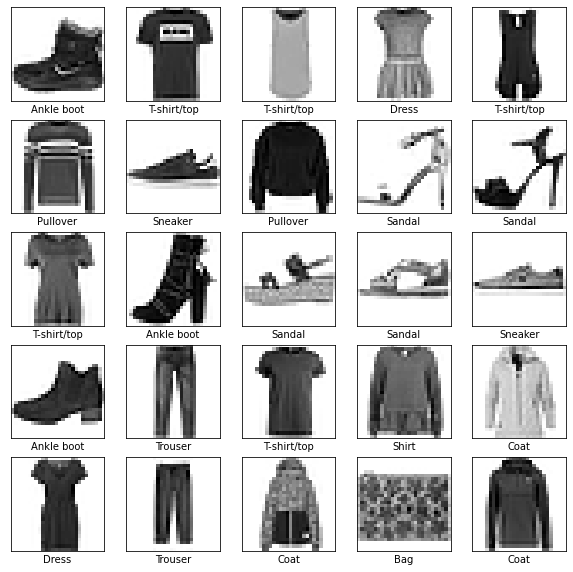

In [12]:
plt.figure(figsize = (10, 10))
for i in range(25):
    plt.subplot(5, 5, i + 1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False) # gird off
    plt.imshow(train_images[i], cmap = plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

# 모델 구성

In [13]:
model = tf.keras.Sequential([
                             tf.keras.layers.Flatten(input_shape = (28, 28)),
                             tf.keras.layers.Dense(128, activation = 'relu'),
                             tf.keras.layers.Dense(10)
])

In [14]:
# from_logits - Whether y_pred is expected to be a logits tensor. By default, we assume that y_pred encodes a probability distribution.
model.compile(optimizer = 'adam', 
              loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits = True),
              metrics = ['accuracy'])

# 모델 훈련

In [15]:
model.fit(train_images, train_labels, epochs = 10)

Epoch 1/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.5010 - accuracy: 0.8239
Epoch 2/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3783 - accuracy: 0.8638
Epoch 3/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3381 - accuracy: 0.8770
Epoch 4/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3129 - accuracy: 0.8842
Epoch 5/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2969 - accuracy: 0.8899
Epoch 6/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2798 - accuracy: 0.8968
Epoch 7/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2689 - accuracy: 0.9009
Epoch 8/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2583 - accuracy: 0.9033
Epoch 9/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2479 - accuracy: 0.9083
Epoch 10/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.238

# 정확도 평가

In [16]:
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose = 2)
print('\nTest accuracy:', test_acc)

313/313 - 1s - loss: 0.3346 - accuracy: 0.8828 - 608ms/epoch - 2ms/step

Test accuracy: 0.8827999830245972


# 예측하기

In [17]:
%time 

probability_model = tf.keras.Sequential([model, tf.keras.layers.Softmax()])
predictions = probability_model.predict(test_images)
predictions[0]

CPU times: user 4 µs, sys: 0 ns, total: 4 µs
Wall time: 8.58 µs


array([3.4431982e-06, 3.7135703e-08, 2.4915928e-06, 2.4474949e-07,
       8.2555825e-06, 1.6609859e-03, 3.5532921e-05, 6.0254298e-03,
       8.4127314e-05, 9.9217951e-01], dtype=float32)

In [18]:
np.argmax(predictions[0])

9

In [19]:
test_labels[0]

9

In [20]:
%time 

predictions_model = model.predict(test_images)
predictions_model[0]

CPU times: user 4 µs, sys: 1e+03 ns, total: 5 µs
Wall time: 8.34 µs


array([ -8.738381 , -13.267958 ,  -9.06186  , -11.382301 ,  -7.863892 ,
        -2.5596151,  -6.4043226,  -1.2710378,  -5.54245  ,   3.8328776],
      dtype=float32)

In [21]:
np.argmax(predictions_model[0])

9

## 10개 클래스에 대한 예측을 모두 그래프로 표현해 보겠습니다:

In [22]:
def plot_image(i, predictions_array, true_label, img):
    true_label, img = true_label[i], img[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])

    plt.imshow(img, cmap = plt.cm.binary)

    predicted_label = np.argmax(predictions_array)
    if predicted_label == true_label:
        color = 'blue'
    else:
        color = 'red'

    plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                    100*np.max(predictions_array),
                                    class_names[true_label]),
                                    color=color)
  
def plot_value_array(i, predictions_array, true_label):
    true_label = true_label[i]
    plt.grid(False)
    plt.xticks(range(10))
    plt.yticks([])
    thisplot = plt.bar(range(10), predictions_array, color = '#777777')
    plt.ylim([0, 1])
    predicted_label = np.argmax(predictions_array)

    thisplot[predicted_label].set_color('red')
    thisplot[true_label].set_color('blue')

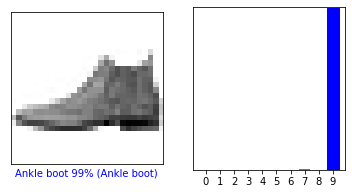

In [23]:
i = 0
plt.figure(figsize = (6, 3))
plt.subplot(1, 2, 1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1, 2, 2)
plot_value_array(i, predictions[i], test_labels)
plt.show()

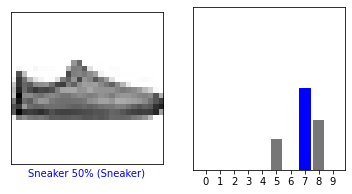

In [24]:
i = 12
plt.figure(figsize = (6, 3))
plt.subplot(1, 2, 1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1, 2, 2)
plot_value_array(i, predictions[i], test_labels)
plt.show()

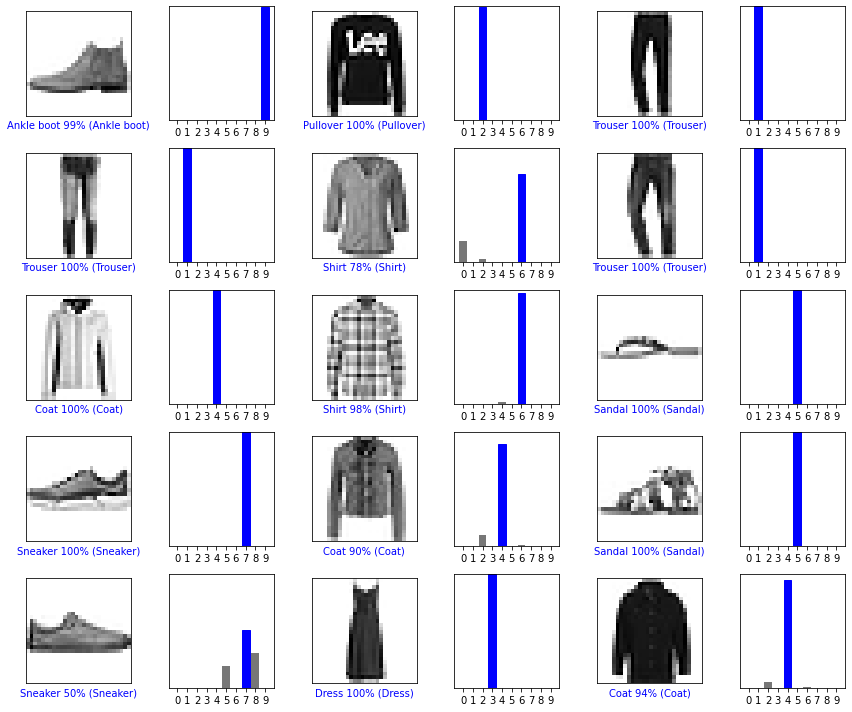

In [25]:
num_rows = 5
num_cols = 3
num_images = num_rows * num_cols
plt.figure(figsize = (2* 2 * num_cols , 2 * num_rows))
for i in range(num_images):
    plt.subplot(num_rows, 2 * num_cols, 2 * i + 1)
    plot_image(i, predictions[i], test_labels, test_images)
    plt.subplot(num_rows, 2 * num_cols, 2 * i + 2)
    plot_value_array(i, predictions[i], test_labels)
plt.tight_layout()
# tight_layout 여백 
plt.show()

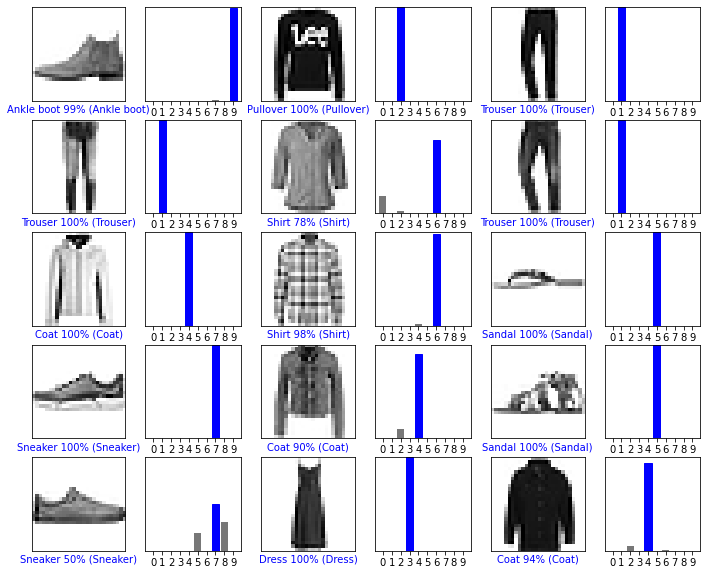

In [26]:
num_rows = 5
num_cols = 3
num_images = num_rows * num_cols
plt.figure(figsize = (2* 2 * num_cols , 2 * num_rows))
for i in range(num_images):
    plt.subplot(num_rows, 2 * num_cols, 2 * i + 1)
    plot_image(i, predictions[i], test_labels, test_images)
    plt.subplot(num_rows, 2 * num_cols, 2 * i + 2)
    plot_value_array(i, predictions[i], test_labels)
plt.show()

In [27]:
img = test_images[1]
print(img.shape)

(28, 28)


In [28]:
img = (np.expand_dims(img, 0))
print(img.shape)

(1, 28, 28)


In [29]:
predictions_single = probability_model.predict(img)
print(predictions_single)

[[2.3234124e-05 2.2195947e-12 9.9823344e-01 2.8386670e-12 1.7306444e-03
  2.6251734e-15 1.2655640e-05 3.3467530e-15 3.9598724e-10 1.2103762e-15]]


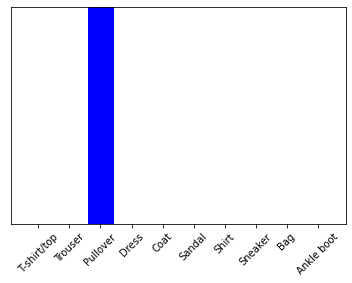

In [30]:
plot_value_array(1, predictions_single[0], test_labels)
_ = plt.xticks(range(10), class_names, rotation = 45)
plt.show()

In [31]:
np.argmax(predictions_single[0])

2